Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

Train Dataset Summary Statistics:
                age        balance     

<ipython-input-1-343f5b968bb1>:43: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)


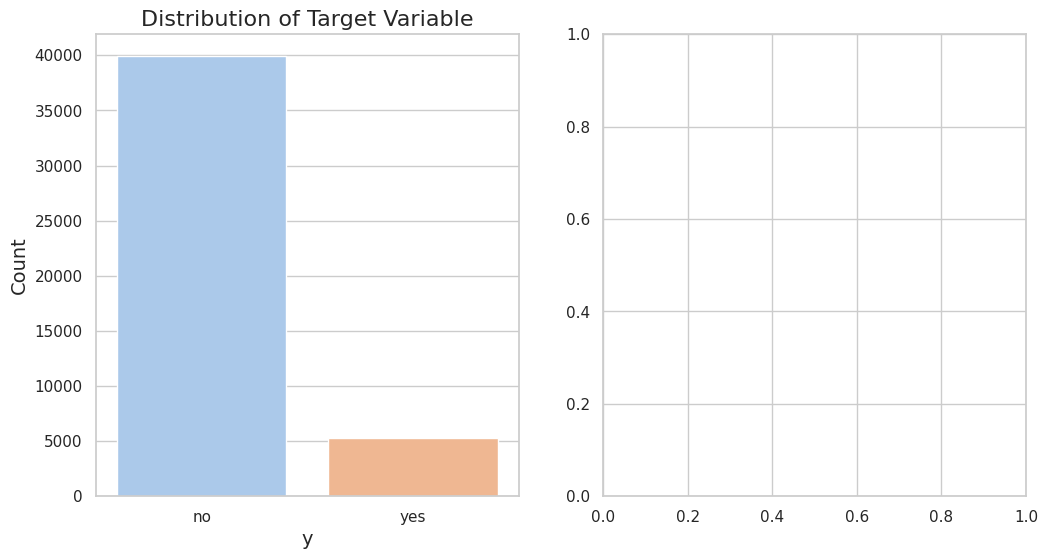

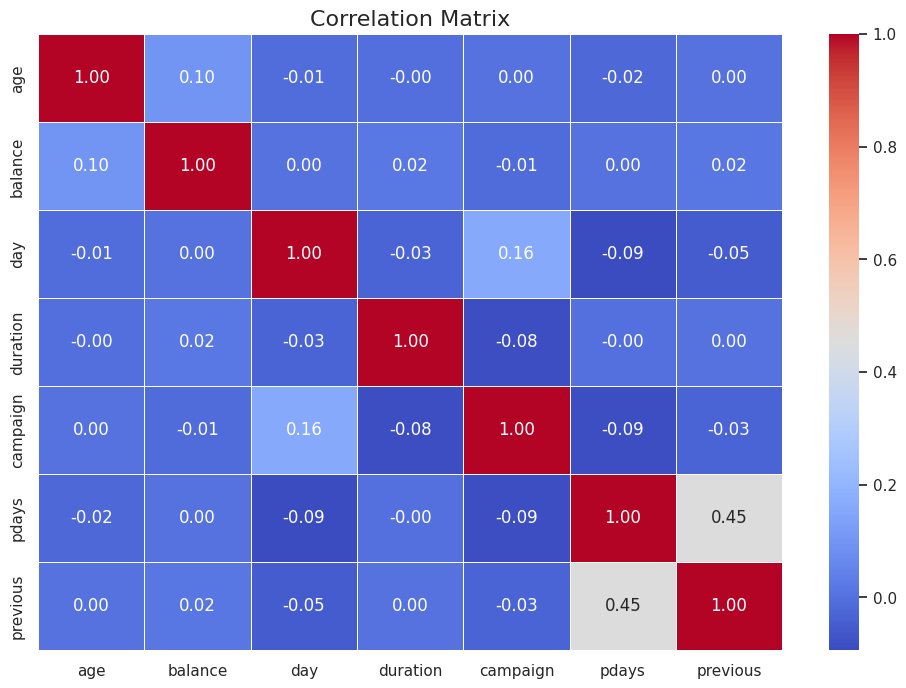

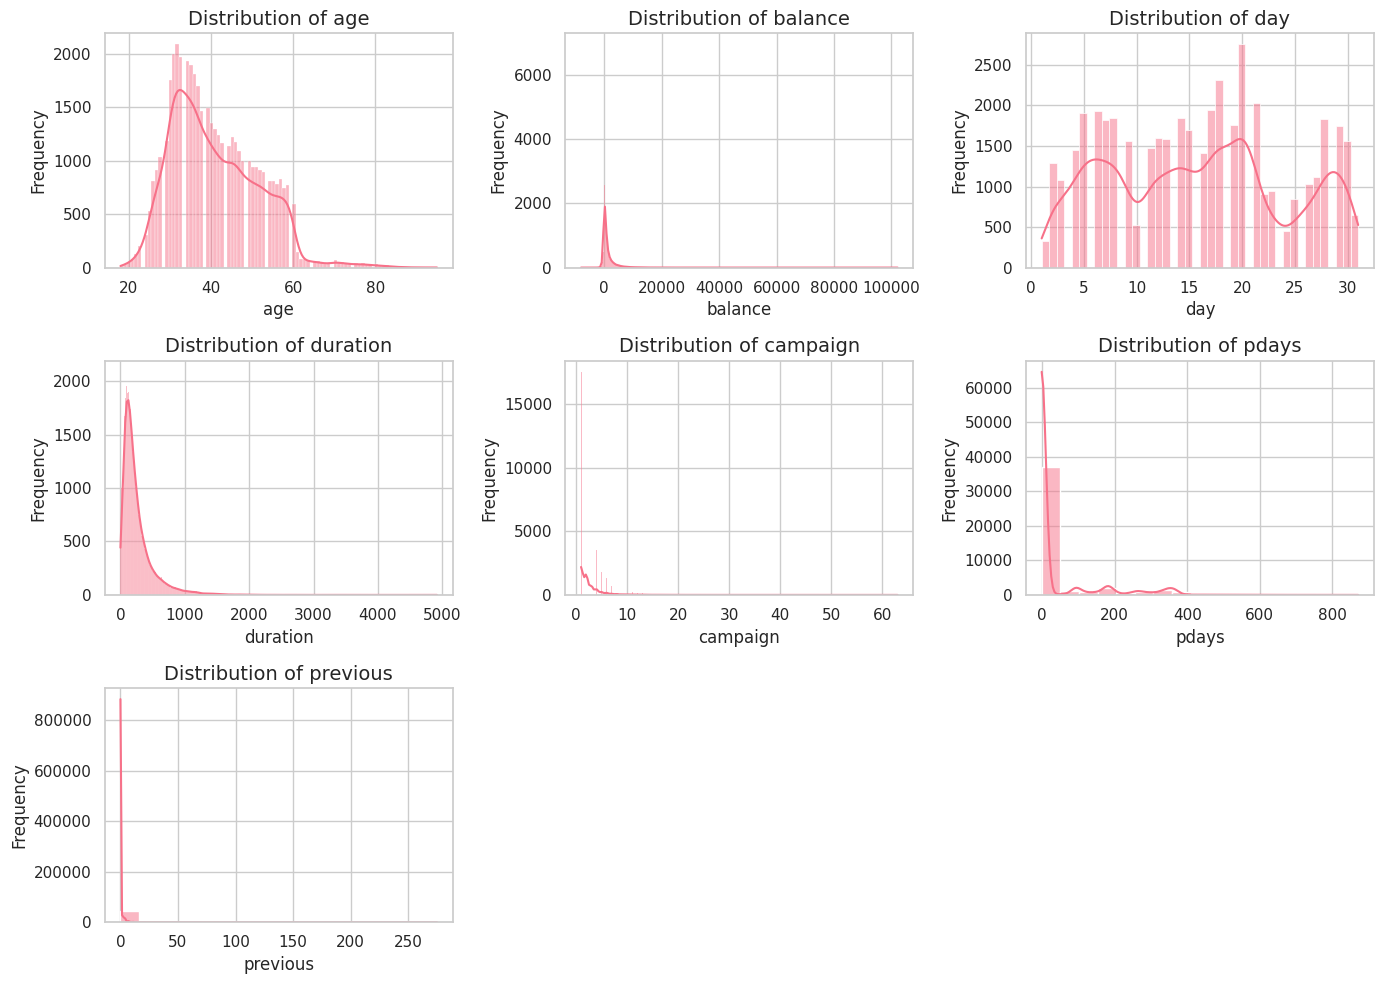

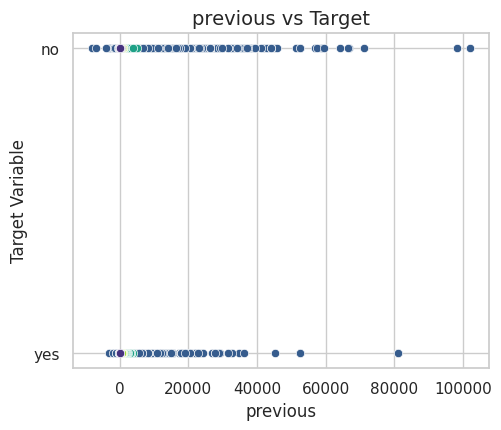

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a seaborn style
sns.set(style="whitegrid")

# Load the train dataset
train_data = pd.read_csv('/content/train.csv', delimiter=';')

# Load the test dataset
test_data = pd.read_csv('/content/test.csv', delimiter=';')

# Display basic information about the train dataset
print("Train Dataset Info:")
print(train_data.info())

# Display basic statistics of the train dataset
print("\nTrain Dataset Summary Statistics:")
print(train_data.describe())

# Display the first few rows of the train dataset
print("\nFirst few rows of Train Dataset:")
print(train_data.head())

# Check for missing values in the train dataset
print("\nMissing Values in Train Dataset:")
print(train_data.isnull().sum())

# Visualize the distribution of the target variable in the train dataset
plt.figure(figsize=(12, 6))
sns.set_palette("pastel")
plt.subplot(1, 2, 1)
sns.countplot(x='y', data=train_data)
plt.title('Distribution of Target Variable', fontsize=16)
plt.xlabel('y', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Visualize the correlation matrix of numerical features in the train dataset
plt.subplot(1, 2, 2)
plt.figure(figsize=(12, 8))
sns.set_palette("coolwarm")
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix', fontsize=16)

plt.show()

# Visualize the distribution of numerical features
num_features = train_data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(14, 10))
sns.set_palette("husl")
for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(train_data[feature], kde=True)
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

# Visualize the correlation between numerical features and the target variable
plt.figure(figsize=(14, 8))
sns.set_palette("viridis")
for i, feature in enumerate(num_features):
    plt.subplot(2, 3, 4)
    sns.scatterplot(x=feature, y='y', data=train_data)
    plt.title(f'{feature} vs Target', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Target Variable', fontsize=12)
plt.tight_layout()
plt.show()


# New Section

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report

# Load the train dataset
train_data = pd.read_csv('/content/train.csv', delimiter=';')

# Load the test dataset
test_data = pd.read_csv('/content/test.csv', delimiter=';')

# Extract features and target variable from train dataset
X_train = train_data.drop('y', axis=1)
y_train = train_data['y']

# Extract features and target variable from test dataset
X_test = test_data.drop('y', axis=1)
y_test = test_data['y']

# Ensure that each class has at least one sample in both training and testing sets
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in stratified_split.split(X_train, y_train):
    X_train_split, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_split, y_val = y_train.iloc[train_index], y_train.iloc[test_index]

# Define categorical columns for one-hot encoding
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])

# Label encode the target variable 'y'
le = LabelEncoder()
y_train_split_encoded = le.fit_transform(y_train_split)
y_test_encoded = le.transform(y_test)

# Ridge Regularization
ridge_classifier = Ridge(alpha=1.0)

# Lasso Regularization
lasso_classifier = Lasso(alpha=1.0)

# Other classifiers
logistic_regression = LogisticRegression()
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
svm_classifier = SVC(probability=True)  # Probability for cross_val_score with log_loss

classifiers = [
    ('Logistic Regression', logistic_regression),
    ('Ridge', ridge_classifier),
    ('Lasso', lasso_classifier),
    ('Random Forest', random_forest_classifier),
    ('Gradient Boosting', gradient_boosting_classifier),
    ('SVM', svm_classifier)
]

# Without PCA and Cross-validation
print("Results without PCA and Cross-validation:")
for clf_name, classifier in classifiers:
    pipeline = Pipeline([('preprocessor', preprocessor), (clf_name, classifier)])
    pipeline.fit(X_train_split, y_train_split_encoded)  # Use the label-encoded training set

    try:
        if hasattr(classifier, 'predict_proba'):
            # For classifiers with predict_proba method (e.g., Logistic Regression)
            y_pred_prob = pipeline.predict_proba(X_test)[:, 1]  # Probability of positive class
        elif hasattr(classifier, 'decision_function'):
            # For classifiers with decision_function method (e.g., SVM, Ridge)
            y_pred_prob = pipeline.decision_function(X_test)
        else:
            # For classifiers without predict_proba or decision_function, fall back to predict
            y_pred_prob = pipeline.predict(X_test)
    except AttributeError:
        print(f"{clf_name} - Classifier doesn't have predict_proba, decision_function, or predict method.")
        continue

    y_pred_binary = (y_pred_prob > 0.5).astype(int)  # Convert to binary using threshold
    print(f"{clf_name} - Accuracy: {accuracy_score(y_test_encoded, y_pred_binary)}")
    print(classification_report(y_test_encoded, y_pred_binary))


Results without PCA and Cross-validation:
Logistic Regression - Accuracy: 0.8940499889404999
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      4000
           1       0.59      0.27      0.37       521

    accuracy                           0.89      4521
   macro avg       0.75      0.62      0.66      4521
weighted avg       0.87      0.89      0.88      4521

Ridge - Accuracy: 0.8907321389073214
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4000
           1       0.59      0.17      0.26       521

    accuracy                           0.89      4521
   macro avg       0.75      0.58      0.60      4521
weighted avg       0.87      0.89      0.86      4521

Lasso - Accuracy: 0.8847600088476001
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      4000
           1       0.00      0.00      0.00       521

    accuracy   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest - Accuracy: 0.982304799823048
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4000
           1       0.95      0.89      0.92       521

    accuracy                           0.98      4521
   macro avg       0.97      0.94      0.96      4521
weighted avg       0.98      0.98      0.98      4521

Gradient Boosting - Accuracy: 0.904888299048883
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      4000
           1       0.64      0.39      0.49       521

    accuracy                           0.90      4521
   macro avg       0.78      0.68      0.72      4521
weighted avg       0.89      0.90      0.89      4521

SVM - Accuracy: 0.9106392391063924
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      4000
           1       0.69      0.40      0.51       521

    accuracy                           0.91      4521
 

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load the data
train_data = pd.read_csv('/content/train.csv', delimiter=';')
test_data = pd.read_csv('/content/test.csv', delimiter=';')

# Extract features and target variable from the dataset
X_train = train_data.drop('y', axis=1)
y_train = train_data['y']
X_test = test_data.drop('y', axis=1)
y_test = test_data['y']

# Separate numerical and categorical columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Preprocess numerical and categorical columns separately
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Label encode the target variable 'y'
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Calculate class weights to handle class imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_encoded), y=y_train_encoded)
class_weights_dict = dict(enumerate(class_weights))

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Build a shallow neural network model
model = Sequential()
# Check the shape of X_train_preprocessed
X_train_preprocessed = preprocessor.fit_transform(X_train)
print("Shape of X_train_preprocessed:", X_train_preprocessed.shape)

model.add(Dense(64, activation='relu', input_dim=X_train_preprocessed.shape[1]))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Preprocess and train the model on the training set
model.fit(X_train_preprocessed, y_train_encoded, epochs=20, batch_size=32, class_weight=class_weights_dict, callbacks=[early_stopping])

# Preprocess and evaluate the model on the test set
X_test_preprocessed = preprocessor.transform(X_test)
y_pred_prob = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred_prob > 0.5).astype(int)
y_pred_labels = le.inverse_transform(y_pred_binary.flatten())

# Evaluate the performance
print("Neural Network - Accuracy:", accuracy_score(y_test, y_pred_labels))
print(classification_report(y_test, y_pred_labels))



Shape of X_train_preprocessed: (45211, 42)
Epoch 1/20
1413/1413 [==============================] - ETA: 0s - loss: 0.4014 - accuracy: 0.8251

1413/1413 [==============================] - 17s 7ms/step - loss: 0.4014 - accuracy: 0.8251
Epoch 2/20
1407/1413 [============================>.] - ETA: 0s - loss: 0.3544 - accuracy: 0.8313

1413/1413 [==============================] - 8s 6ms/step - loss: 0.3543 - accuracy: 0.8313
Epoch 3/20
1407/1413 [============================>.] - ETA: 0s - loss: 0.3421 - accuracy: 0.8352

1413/1413 [==============================] - 6s 4ms/step - loss: 0.3420 - accuracy: 0.8352
Epoch 4/20
1413/1413 [==============================] - ETA: 0s - loss: 0.3344 - accuracy: 0.8363

1413/1413 [==============================] - 8s 6ms/step - loss: 0.3344 - accuracy: 0.8363
Epoch 5/20
1413/1413 [==============================] - ETA: 0s - loss: 0.3271 - accuracy: 0.8408

1413/1413 [==============================] - 7s 5ms/step - loss: 0.3271 - accuracy: 0.8408
Epoch 6/20
1405/1413 [============================>.] - ETA: 0s - loss: 0.3226 - accuracy: 0.8407

1413/1413 [==============================] - 7s 5ms/step - loss: 0.3224 - accuracy: 0.8408
Epoch 7/20
1407/1413 [============================>.] - ETA: 0s - loss: 0.3182 - accuracy: 0.8448

1413/1413 [==============================] - 6s 4ms/step - loss: 0.3182 - accuracy: 0.8446
Epoch 8/20
1402/1413 [============================>.] - ETA: 0s - loss: 0.3147 - accuracy: 0.8453

1413/1413 [==============================] - 8s 5ms/step - loss: 0.3144 - accuracy: 0.8452
Epoch 9/20
1405/1413 [============================>.] - ETA: 0s - loss: 0.3107 - accuracy: 0.8475

1413/1413 [==============================] - 6s 4ms/step - loss: 0.3106 - accuracy: 0.8474
Epoch 10/20
1403/1413 [============================>.] - ETA: 0s - loss: 0.3083 - accuracy: 0.8485

1413/1413 [==============================] - 8s 5ms/step - loss: 0.3080 - accuracy: 0.8484
Epoch 11/20
1409/1413 [============================>.] - ETA: 0s - loss: 0.3070 - accuracy: 0.8491

1413/1413 [==============================] - 7s 5ms/step - loss: 0.3068 - accuracy: 0.8492
Epoch 12/20
1407/1413 [============================>.] - ETA: 0s - loss: 0.3043 - accuracy: 0.8514

1413/1413 [==============================] - 8s 6ms/step - loss: 0.3041 - accuracy: 0.8515
Epoch 13/20
1411/1413 [============================>.] - ETA: 0s - loss: 0.3008 - accuracy: 0.8522

1413/1413 [==============================] - 6s 4ms/step - loss: 0.3009 - accuracy: 0.8522
Epoch 14/20
1410/1413 [============================>.] - ETA: 0s - loss: 0.2995 - accuracy: 0.8535

1413/1413 [==============================] - 7s 5ms/step - loss: 0.2994 - accuracy: 0.8535
Epoch 15/20
1409/1413 [============================>.] - ETA: 0s - loss: 0.2983 - accuracy: 0.8538

1413/1413 [==============================] - 7s 5ms/step - loss: 0.2982 - accuracy: 0.8538
Epoch 16/20
1406/1413 [============================>.] - ETA: 0s - loss: 0.2967 - accuracy: 0.8557

1413/1413 [==============================] - 7s 5ms/step - loss: 0.2965 - accuracy: 0.8557
Epoch 17/20
1401/1413 [============================>.] - ETA: 0s - loss: 0.2958 - accuracy: 0.8557

1413/1413 [==============================] - 8s 5ms/step - loss: 0.2952 - accuracy: 0.8561
Epoch 18/20
1408/1413 [============================>.] - ETA: 0s - loss: 0.2943 - accuracy: 0.8566

1413/1413 [==============================] - 7s 5ms/step - loss: 0.2942 - accuracy: 0.8566
Epoch 19/20
1411/1413 [============================>.] - ETA: 0s - loss: 0.2925 - accuracy: 0.8581

1413/1413 [==============================] - 7s 5ms/step - loss: 0.2924 - accuracy: 0.8582
Epoch 20/20
1407/1413 [============================>.] - ETA: 0s - loss: 0.2913 - accuracy: 0.8584

142/142 [==============================] - 0s 3ms/step
Neural Network - Accuracy: 0.8491484184914841
              precision    recall  f1-score   support

          no       0.99      0.84      0.91      4000
         yes       0.43      0.92      0.58       521

    accuracy                           0.85      4521
   macro avg       0.71      0.88      0.75      4521
weighted avg       0.92      0.85      0.87      4521

